In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

In [124]:
# IMPORT: Tableau Superstore dataset

df = pd.read_csv("../data/superstore.csv")

In [125]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [126]:
# CHANGE: to non-numeric types

# Type Change: 2 columns -> str
df['Customer ID'] = df['Customer ID'].astype("string")
df['Product ID'] = df['Product ID'].astype("string")

# Type Change: 5 columns -> category 
df['Ship Mode'] = df['Ship Mode'].astype("category")
df['Segment'] = df['Segment'].astype("category")
df['Region'] = df['Region'].astype("category")
df['Category'] = df['Category'].astype("category")
df['Sub-Category'] = df['Sub-Category'].astype("category")

# Type Change: 2 columns -> datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [127]:
# CHANGE: datetime to int

#df['Order Date'] = df['Order Date'].astype(int) / 10**14
#df['Ship Date'] = df['Ship Date'].astype(int) / 10**14
df['Order Date'] = df['Order Date'].values.astype(int) / 10**14
df['Ship Date'] = df['Ship Date'].values.astype(int) / 10**14

In [128]:
# ASSIGN: ids to string id columns

id_columns = [
    "Customer ID",
    "Product ID",
]
for i in id_columns:
    df[i+'_id'] = df.groupby(i).ngroup()

In [129]:
# DROP: 10 Columns

# id: "Customer ID", "Product ID"
# no value: "Row ID", "Order ID", "Country"
# redundancy: "Customer Name", "Product Name", "City", "State", "Postal Code"

noval_columns = [
   "index", "Row ID", "Order ID", "Country"
]
redundant_columns = [
    "Customer Name", "Product Name", 
    "City", "State", "Postal Code"
]
dropping_columns = id_columns + noval_columns + redundant_columns



In [130]:
df[['Sales']]

,Sales
0,261.9600
1,731.9400
2,14.6200
3,957.5775
4,22.3680
...,...
9989,25.2480
9990,91.9600
9991,258.5760
9992,29.6000


In [131]:
sales_099 = df[['Sales']].quantile(q=0.99, numeric_only=True, interpolation='linear')
sales_001 = df[['Sales']].quantile(q=0.01, numeric_only=True,interpolation='linear')

profit_099 = df[['Profit']].quantile(q=0.99, numeric_only=True,interpolation='linear')
profit_001 = df[['Profit']].quantile(q=0.01, numeric_only=True,interpolation='linear')

In [132]:
no_outlier_df = df[df['Sales']<float(sales_099)]
no_outlier_df = no_outlier_df[no_outlier_df['Sales']>float(sales_001)]
no_outlier_df = no_outlier_df[no_outlier_df['Profit']>float(profit_001)]
no_outlier_df = no_outlier_df[no_outlier_df['Profit']<float(profit_099)]

In [133]:
no_outlier_df= no_outlier_df.reset_index()

In [134]:
df_f = no_outlier_df.drop(columns=dropping_columns)

In [135]:
df_f

,Order Date,Ship Date,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Customer ID_id,Product ID_id
0,-1.980301e-05,0.000010,Second Class,Consumer,South,Furniture,Bookcases,261.960,2,0.0,41.9136,143,12
1,-1.980301e-05,0.000010,Second Class,Consumer,South,Furniture,Chairs,731.940,3,0.0,219.5820,143,55
2,-1.512571e-06,0.000010,Second Class,Corporate,West,Office Supplies,Labels,14.620,2,0.0,6.8714,237,946
3,-4.298506e-06,-0.000005,Standard Class,Consumer,South,Office Supplies,Storage,22.368,2,0.2,2.5164,705,1316
4,1.450836e-05,0.000008,Standard Class,Consumer,West,Furniture,Furnishings,48.860,7,0.0,14.1694,88,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9660,1.888813e-05,-0.000018,Second Class,Consumer,South,Furniture,Furnishings,25.248,3,0.2,4.1028,737,200
9661,-1.021706e-06,-0.000008,Standard Class,Consumer,West,Furniture,Furnishings,91.960,2,0.0,15.6332,190,164
9662,-1.021706e-06,-0.000008,Standard Class,Consumer,West,Technology,Phones,258.576,2,0.2,19.3932,190,1816
9663,-1.021706e-06,-0.000008,Standard Class,Consumer,West,Office Supplies,Paper,29.600,4,0.0,13.3200,190,1247


In [136]:
# PROFILE: exploratory analysis

# import ydata_profiling as yp

# report_super_f = df_f.profile_report()
# report_super_f.to_file(output_file="0409_super_f_report.html")

In [137]:
# ENCODE: 5 categories' datatype

category_columns = [
    "Ship Mode", #4
    "Segment", #3
    "Region", #4
    "Category", #3
    "Sub-Category" #17
]

for i in category_columns:
    ohe = OneHotEncoder()
    ohe_df = pd.DataFrame(
        ohe.fit_transform(df_f[[i]]).toarray())
    # add suffix to column names in ohe_df
    ohe_df.columns = ohe_df.columns.astype(str)
    ohe_df = ohe_df.add_suffix(i)
    df_f = df_f.join(ohe_df)

df_f = df_f.drop(category_columns, axis=1)

In [138]:
df_f

,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Customer ID_id,Product ID_id,0Ship Mode,1Ship Mode,...,7Sub-Category,8Sub-Category,9Sub-Category,10Sub-Category,11Sub-Category,12Sub-Category,13Sub-Category,14Sub-Category,15Sub-Category,16Sub-Category
0,-1.980301e-05,0.000010,261.960,2,0.0,41.9136,143,12,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.980301e-05,0.000010,731.940,3,0.0,219.5820,143,55,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.512571e-06,0.000010,14.620,2,0.0,6.8714,237,946,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-4.298506e-06,-0.000005,22.368,2,0.2,2.5164,705,1316,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.450836e-05,0.000008,48.860,7,0.0,14.1694,88,185,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9660,1.888813e-05,-0.000018,25.248,3,0.2,4.1028,737,200,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9661,-1.021706e-06,-0.000008,91.960,2,0.0,15.6332,190,164,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9662,-1.021706e-06,-0.000008,258.576,2,0.2,19.3932,190,1816,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9663,-1.021706e-06,-0.000008,29.600,4,0.0,13.3200,190,1247,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [139]:
len(df.columns)

23

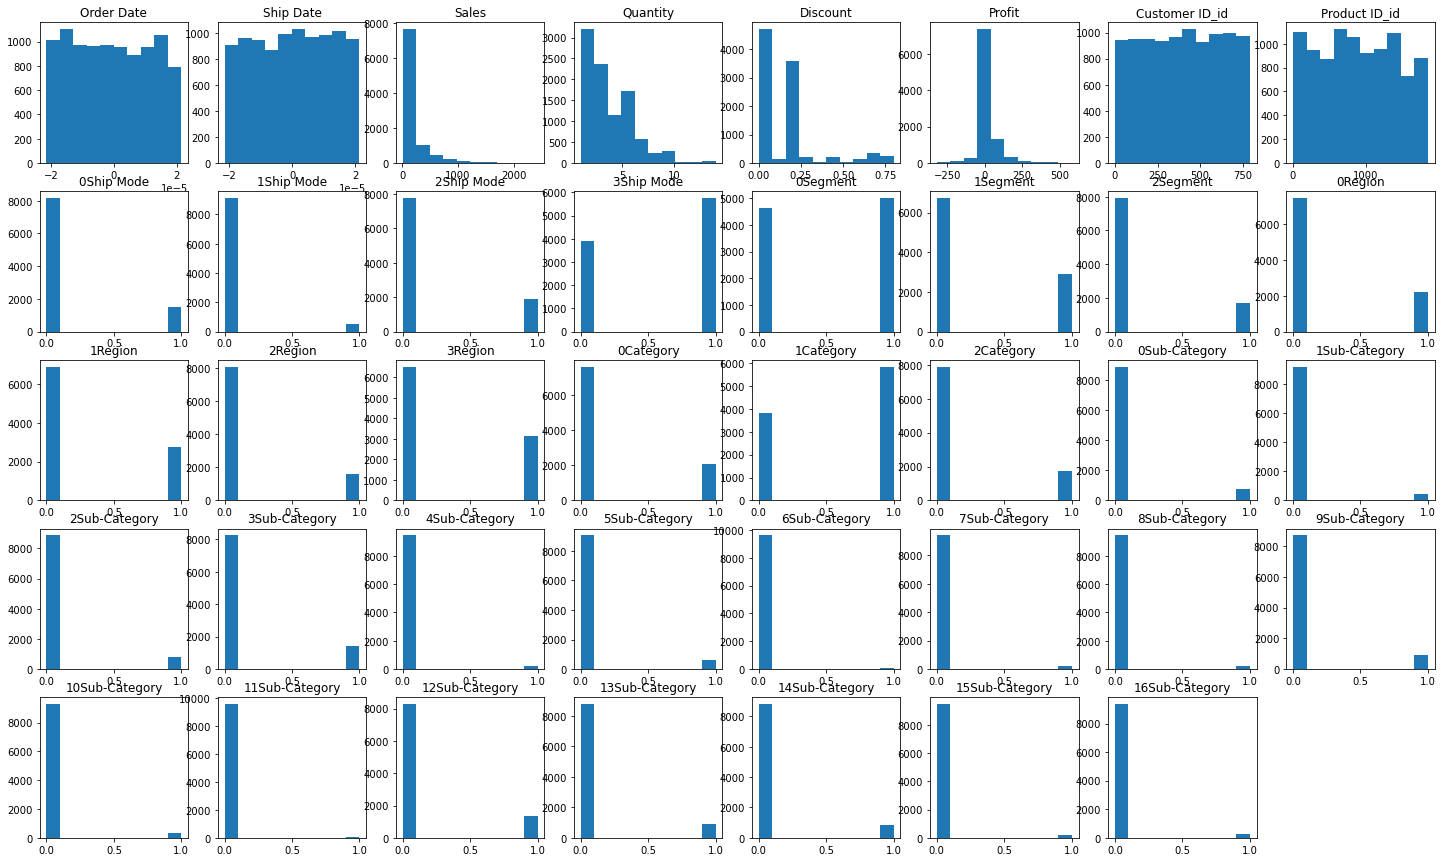

In [140]:
plt.figure(figsize=(25,15))
for i in range(len(df_f.columns)):
    plt.subplot(5, 8, i+1)
    plt.hist(df_f.iloc[:,[i]].to_numpy())
    plt.title(df_f.columns.values.tolist()[i])

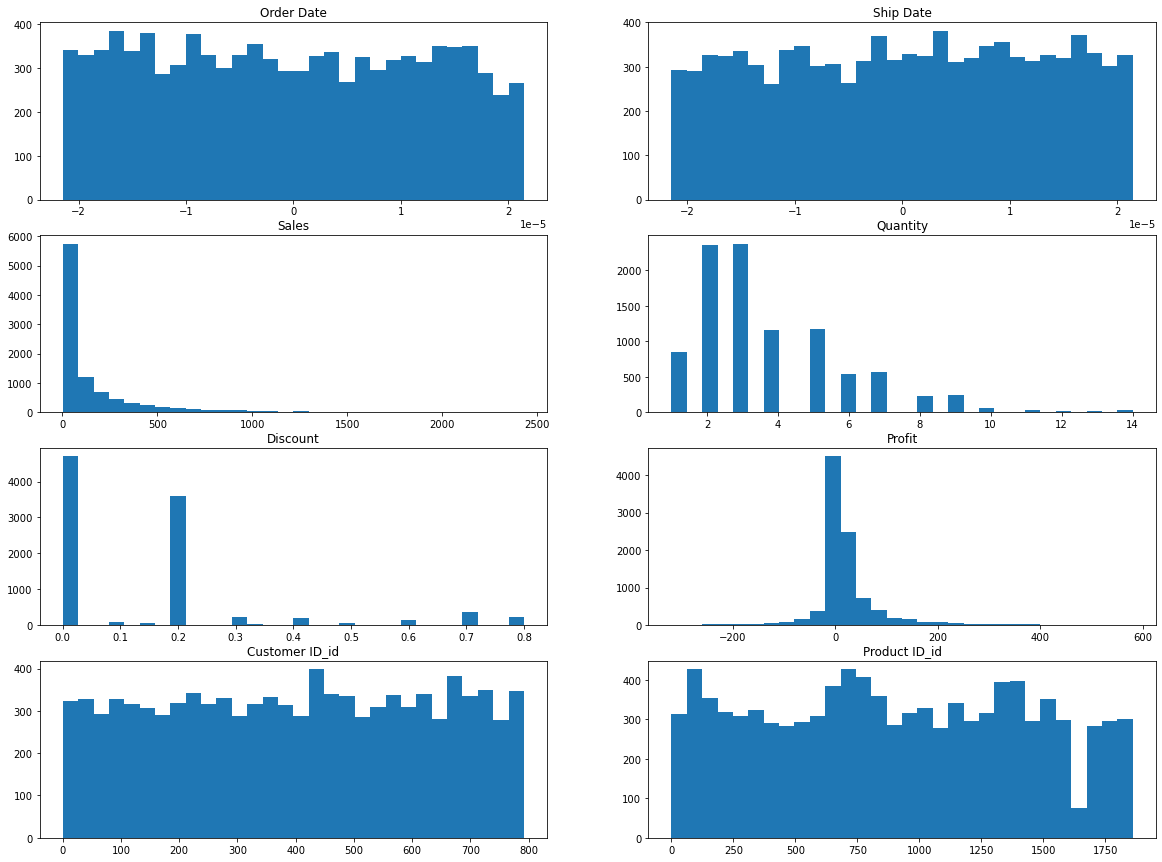

In [141]:
plt.figure(figsize=(20,15))
for i in range(8):
    plt.subplot(4, 2, i+1)
    plt.hist(df_f.iloc[:,[i]].to_numpy(), bins=30)
    plt.title(df_f.columns.values.tolist()[i])

Order Date: Uniform
Ship Date: Uniform
Customer ID_id : Uniform. However, I think Customer ID and Product ID itself should not be scaled nor be used as clustering feature
                Because if we treat it as number, it will generate numeric relation.
                Besides, clustering with Customer ID/Product ID itself has no implication.
Sales: Lognormal + extraordinary large value exist
Quantity: Chi-squared, Sparse value has meaning
Discount: Lognormal, Sparse value has meaning
Profit: Gaussian + extraordinary large value exist


In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
# PowerTransformer is divided by two method -'box-cox', 'yeo-johnson'. Choose better one.

In [143]:
# NORMALIZE
scaled_df_f = df_f.copy(deep=True)

scaler = MinMaxScaler()
scaled_df_f.iloc[:,[0]] = scaler.fit_transform(df_f.iloc[:,[0]])
scaled_df_f.iloc[:,[1]] = scaler.fit_transform(df_f.iloc[:,[1]])

In [144]:
scaler = StandardScaler()
scaled_df_f.iloc[:,[2]] = scaler.fit_transform(df_f.iloc[:,[3]])

In [145]:
scaler = StandardScaler()
scaled_df_f.iloc[:,[3]] = scaler.fit_transform(df_f.iloc[:,[3]])

In [146]:
#I'm not sure what trnasformer should be used for Discount

#scaler = PowerTransformer(method='yeo-johnson', standardize=True)
#scaled_df_f.iloc[:,[4]] = scaler.fit_transform(dropout_df_f.iloc[:,[4]])

In [147]:
scaler = StandardScaler()
scaled_df_f.iloc[:,[5]] = scaler.fit_transform(df_f.iloc[:,[5]])

In [148]:
# NORMALIZE ID
# If we use ID for clustering, MinMaxScaler will be the best option.

scaler = MinMaxScaler()
scaled_df_f.iloc[:,[6]] = scaler.fit_transform(df_f.iloc[:,[6]])
scaled_df_f.iloc[:,[7]] = scaler.fit_transform(df_f.iloc[:,[7]])

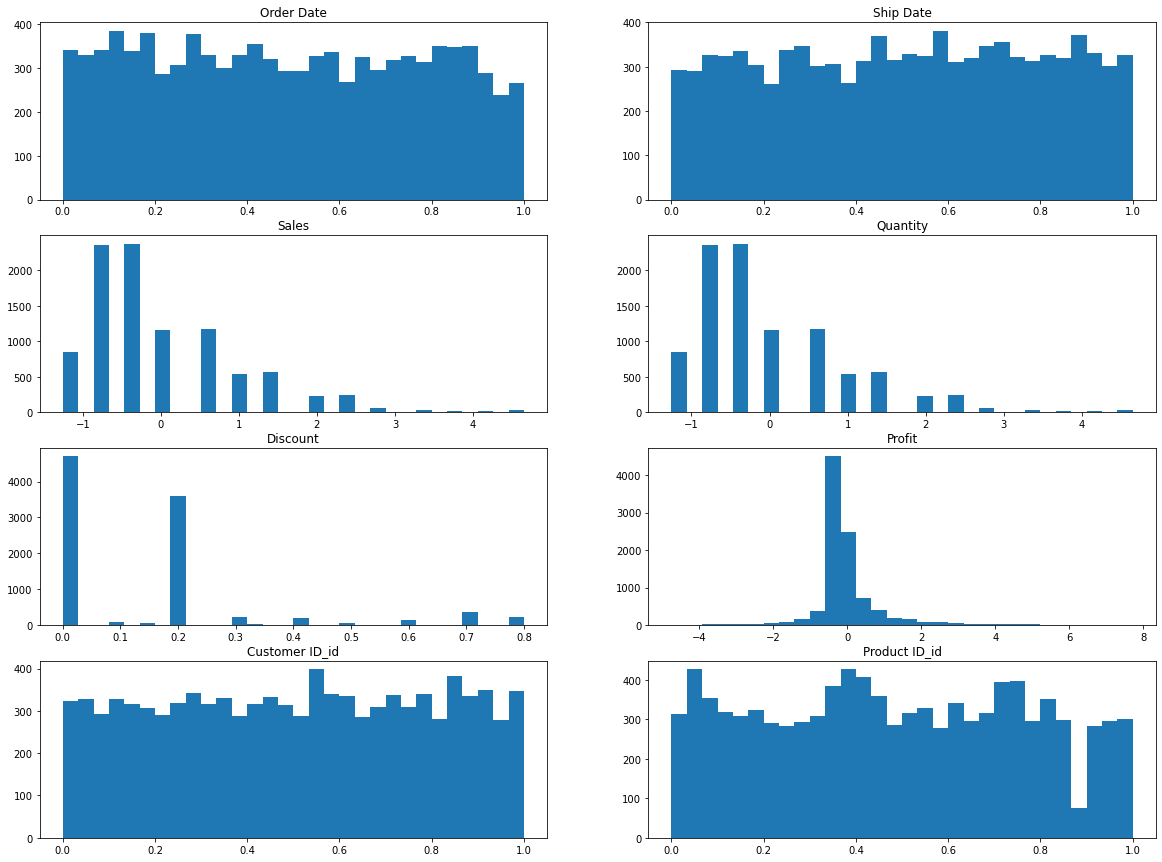

In [149]:
plt.figure(figsize=(20,15))
for i in range(8):
    plt.subplot(4, 2, i+1)
    plt.hist(scaled_df_f.iloc[:,[i]].to_numpy(), bins=30)
    plt.title(scaled_df_f.columns.values.tolist()[i])

In [150]:
scaled_df_f

,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Customer ID_id,Product ID_id,0Ship Mode,1Ship Mode,...,7Sub-Category,8Sub-Category,9Sub-Category,10Sub-Category,11Sub-Category,12Sub-Category,13Sub-Category,14Sub-Category,15Sub-Category,16Sub-Category
0,0.038759,0.742790,-0.801884,-0.801884,0.0,0.250343,0.180556,0.006448,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.038759,0.742790,-0.347379,-0.347379,0.0,2.712088,0.180556,0.029554,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.464805,0.736248,-0.801884,-0.801884,0.0,-0.235196,0.299242,0.508329,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.399911,0.373626,-0.801884,-0.801884,0.2,-0.295538,0.890152,0.707147,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.837987,0.676779,1.470637,1.470637,0.0,-0.134076,0.111111,0.099409,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9660,0.940006,0.074936,-0.347379,-0.347379,0.2,-0.273557,0.930556,0.107469,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9661,0.476239,0.314601,-0.801884,-0.801884,0.0,-0.113794,0.239899,0.088125,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9662,0.476239,0.314601,-0.801884,-0.801884,0.2,-0.061696,0.239899,0.975819,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9663,0.476239,0.314601,0.107125,0.107125,0.0,-0.145845,0.239899,0.670070,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Clustering

Explained Variance: [3.04579867e-01 1.43472078e-01 6.58917193e-02 5.82790558e-02
 5.06353662e-02 4.83142097e-02 4.52304106e-02 3.71837468e-02
 3.17288131e-02 2.64776276e-02 2.52283453e-02 2.24879510e-02
 1.64277186e-02 1.35661586e-02 1.30178385e-02 1.24758566e-02
 1.19391694e-02 1.16833346e-02 1.14074399e-02 9.69787614e-03
 8.24145041e-03 6.22199438e-03 5.62057389e-03 4.35487796e-03
 3.71544703e-03 3.49865647e-03 3.14365021e-03 3.03637245e-03
 1.59109382e-03 7.82953769e-04 6.83465509e-05]


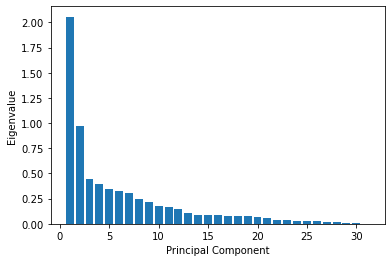

In [151]:
# perform PCA
pca_mle = PCA(n_components='mle', svd_solver='full')
pca_mle_df = pca_mle.fit_transform(scaled_df_f)

# print the results
print(("Explained Variance: %s") % (pca_mle.explained_variance_ratio_))


plt.bar(np.arange(1, pca_mle.n_components_+1), pca_mle.explained_variance_)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

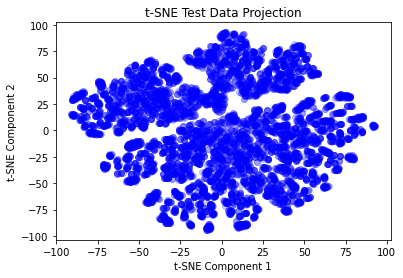

In [173]:
# t-Distributed Stochastic Neighbor Embedding

from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=2023, perplexity=30)
tsne_df = tsne.fit_transform(scaled_df_f)

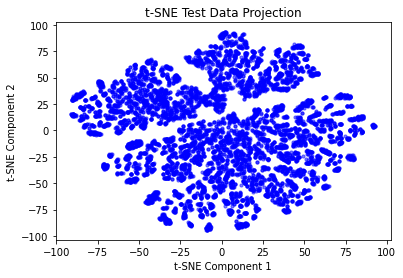

In [178]:
# Plot the transformed test data
plt.scatter(tsne_df[:, 0], tsne_df[:, 1], c='blue', marker='o', alpha=0.5, s= 10)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Test Data Projection')
plt.show()

## Evaluation Metric

In [153]:
# Clustering Validation - silhouette_score, Calinski-Harabasz Index

from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn import metrics
from sklearn.metrics import pairwise_distances

# Clustering Method - Kmean, Hierarchical
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


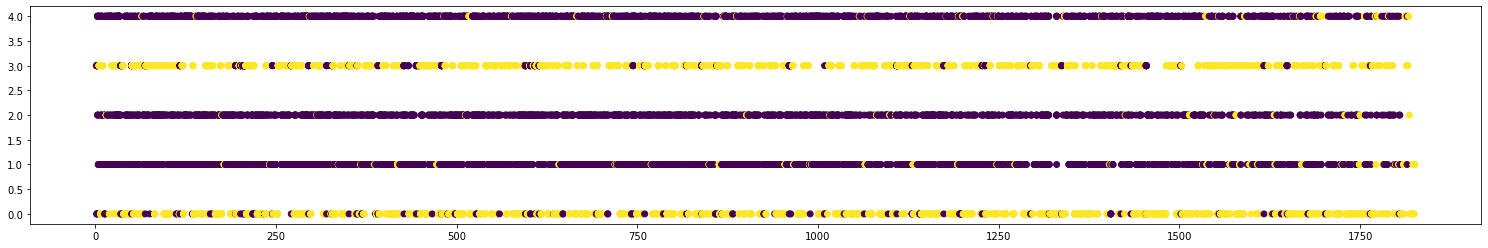

In [164]:
kmeans5 = KMeans(n_clusters=5, random_state=0)
kmeans5.fit(tsne_df)

product={}

for i in range(len(no_outlier_df)):
    if no_outlier_df['Product Name'][i] not in product:
        product[no_outlier_df['Product Name'][i]] = []
        product[no_outlier_df['Product Name'][i]].append(kmeans5.labels_[i])
    else:
        product[no_outlier_df['Product Name'][i]].append(kmeans5.labels_[i])

x_number = []
y_cluster = []
c_product = []
c_isitsame = []

c=0
for i in product:
    c=c+1
    for j in range(len(product[i])):
        #print(i, product[i][j], c)
        x_number.append(len(x_number)+1)
        y_cluster.append(product[i][j])
        c_product.append(c)
        c_isitsame.append(len(set(product[i]))<=1)


fig = plt.figure(figsize=(26,4))
plt.scatter(c_product, y_cluster, c=c_isitsame)
plt.show()

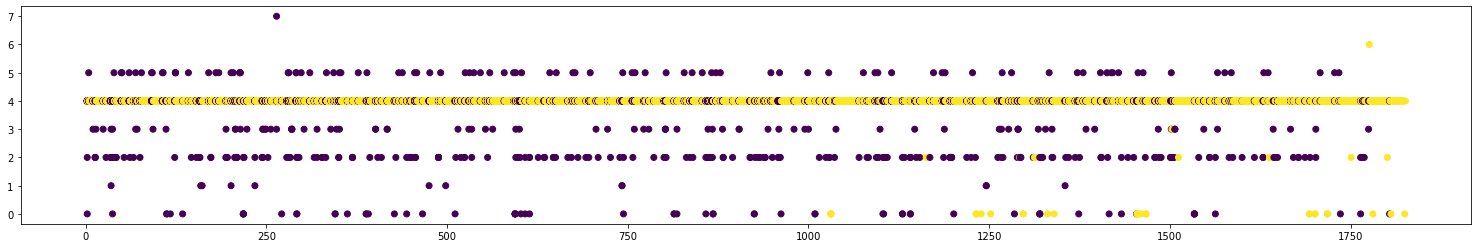

In [172]:
kmeans4 = AgglomerativeClustering(n_clusters=8, linkage="average")
kmeans4.fit(pca_mle_df)

product={}

for i in range(len(no_outlier_df)):
    if no_outlier_df['Product Name'][i] not in product:
        product[no_outlier_df['Product Name'][i]] = []
        product[no_outlier_df['Product Name'][i]].append(kmeans4.labels_[i])
    else:
        product[no_outlier_df['Product Name'][i]].append(kmeans4.labels_[i])

x_number = []
y_cluster = []
c_product = []
c_isitsame = []

c=0
for i in product:
    c=c+1
    for j in range(len(product[i])):
        #print(i, product[i][j], c)
        x_number.append(len(x_number)+1)
        y_cluster.append(product[i][j])
        c_product.append(c)
        c_isitsame.append(len(set(product[i]))<=1)


fig = plt.figure(figsize=(26,4))
plt.scatter(c_product, y_cluster, c=c_isitsame)
plt.show()

In [159]:
range_n_clusters = [4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
Calinski = []
clustering_score = []
Name = []

silhouette_avg.append([])
Calinski.append([])
clustering_score.append([])
Name.append('PCA-KMean')
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(pca_mle_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg[-1].append(silhouette_score(pca_mle_df, cluster_labels))
    Calinski[-1].append(metrics.calinski_harabasz_score(pca_mle_df, cluster_labels))

    product={}
    for i in range(len(no_outlier_df)):
        if no_outlier_df['Product Name'][i] not in product:
            product[no_outlier_df['Product Name'][i]] = []
            product[no_outlier_df['Product Name'][i]].append(clusterer.labels_[i])
        else:
            product[no_outlier_df['Product Name'][i]].append(clusterer.labels_[i])
    c = 0
    for i in product:
        c += (len(set(product[i]))<=1)
    clustering_score[-1].append(c/len(product))

    
silhouette_avg.append([])
Calinski.append([])
clustering_score.append([])
Name.append('PCA-Hierarchical')
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage="average")
    cluster_labels = clusterer.fit_predict(pca_mle_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg[-1].append(silhouette_score(pca_mle_df, cluster_labels))
    Calinski[-1].append(metrics.calinski_harabasz_score(pca_mle_df, cluster_labels))

    product={}
    for i in range(len(no_outlier_df)):
        if no_outlier_df['Product Name'][i] not in product:
            product[no_outlier_df['Product Name'][i]] = []
            product[no_outlier_df['Product Name'][i]].append(clusterer.labels_[i])
        else:
            product[no_outlier_df['Product Name'][i]].append(clusterer.labels_[i])
    c = 0
    for i in product:
        c += (len(set(product[i]))<=1)
    clustering_score[-1].append(c/len(product))


silhouette_avg.append([])
Calinski.append([])
clustering_score.append([])
Name.append('TSNE-KMean')
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(tsne_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg[-1].append(silhouette_score(tsne_df, cluster_labels))
    Calinski[-1].append(metrics.calinski_harabasz_score(tsne_df, cluster_labels))

    product={}
    for i in range(len(no_outlier_df)):
        if no_outlier_df['Product Name'][i] not in product:
            product[no_outlier_df['Product Name'][i]] = []
            product[no_outlier_df['Product Name'][i]].append(clusterer.labels_[i])
        else:
            product[no_outlier_df['Product Name'][i]].append(clusterer.labels_[i])
    c = 0
    for i in product:
        c += (len(set(product[i]))<=1)
    clustering_score[-1].append(c/len(product))


silhouette_avg.append([])
Calinski.append([])
clustering_score.append([])
Name.append('TSNE-Hierarchical')
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage="average")
    cluster_labels = clusterer.fit_predict(tsne_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg[-1].append(silhouette_score(tsne_df, cluster_labels))
    Calinski[-1].append(metrics.calinski_harabasz_score(tsne_df, cluster_labels))

    product={}
    for i in range(len(no_outlier_df)):
        if no_outlier_df['Product Name'][i] not in product:
            product[no_outlier_df['Product Name'][i]] = []
            product[no_outlier_df['Product Name'][i]].append(clusterer.labels_[i])
        else:
            product[no_outlier_df['Product Name'][i]].append(clusterer.labels_[i])
    c = 0
    for i in product:
        c += (len(set(product[i]))<=1)
    clustering_score[-1].append(c/len(product))



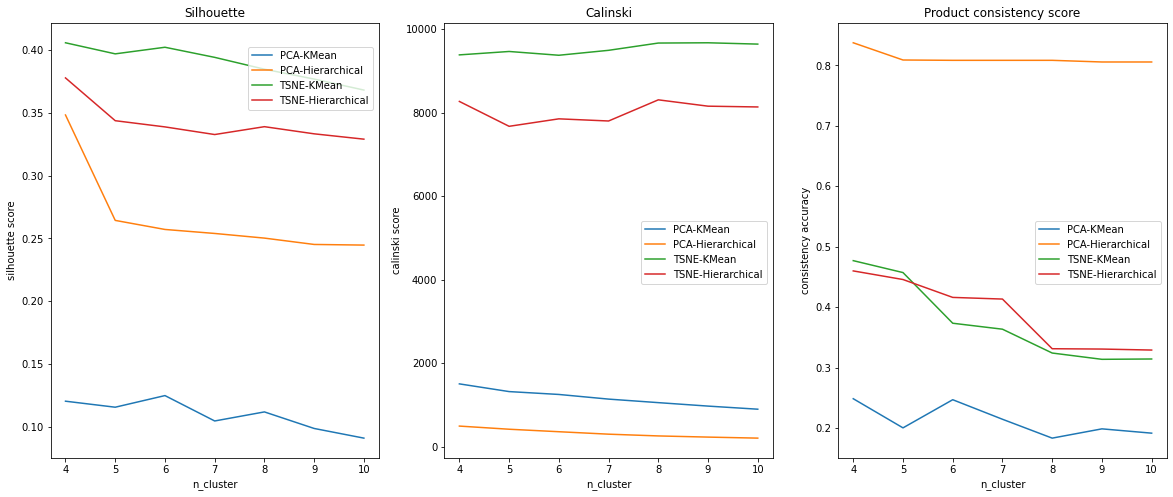

In [160]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
for i in range(len(silhouette_avg)):
    plt.plot(range_n_clusters, silhouette_avg[i], label = Name[i])
plt.title('Silhouette')
plt.xlabel('n_cluster')
plt.ylabel('silhouette score')
plt.legend(loc=(0.6, 0.8))

plt.subplot(1, 3, 2)
for i in range(len(Calinski)):
    plt.plot(range_n_clusters, Calinski[i], label = Name[i])
plt.title('Calinski')
plt.xlabel('n_cluster')
plt.ylabel('calinski score')
plt.legend(loc=(0.6, 0.4))


plt.subplot(1, 3, 3)
for i in range(len(clustering_score)):
    plt.plot(range_n_clusters, clustering_score[i], label = Name[i])
plt.title('Product consistency score')
plt.xlabel('n_cluster')
plt.ylabel('consistency accuracy')
plt.legend(loc=(0.6, 0.4))

plt.show()